# Quotes

In [1]:
import gzip
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(gzip.open('../2016/20160307_AAPL.csv.gz', 'rt'))
data.head(5)

,Time,Ticker,Order,T,Shares,Price,MPID,X
0,14401574,AAPL,170282,S,2,1055500,NaN,Q
1,14401574,AAPL,170283,S,2,1065300,NaN,Q
2,14401574,AAPL,170284,S,2,1075200,NaN,Q
3,14401574,AAPL,170285,S,2,1045800,NaN,Q
4,14401574,AAPL,170286,B,2,988700,NaN,Q


In [3]:
time = [data.iloc[0]['Time']]
sell = [data.loc[data['T'] == 'S'].iloc[0]['Price']]
buy = [data.loc[data['T'] == 'B'].iloc[0]['Price']]
order_sell = [data.loc[data['T'] == 'S'].iloc[0]['Order']]
order_buy = [data.loc[data['T'] == 'B'].iloc[0]['Order']]
order = [0]
del_exe = []

for d in range(100000):
    if (data.iloc[d]['T'] == 'S' and
        data.iloc[d]['Price'] < sell[-1] and
        data.iloc[d]['Time'] != time[-1]):
        
        time.append(data.iloc[d]['Time'])
        sell.append(data.iloc[d]['Price'])
        buy.append(buy[-1])
        order_sell.append(data.iloc[d]['Order'])
        order.append(data.iloc[d]['Order'])
        
    elif (data.iloc[d]['T'] == 'S' and
        data.iloc[d]['Price'] < sell[-1] and
        data.iloc[d]['Time'] == time[-1]):
        
        sell[-1] = data.iloc[d]['Price']
        order_sell[-1] = data.iloc[d]['Order']
        order[-1] = data.iloc[d]['Order']
        
    elif (data.iloc[d]['T'] == 'B' and
          data.iloc[d]['Price'] > buy[-1] and
          data.iloc[d]['Time'] != time[-1]):
          
        time.append(data.iloc[d]['Time'])
        buy.append(data.iloc[d]['Price'])
        sell.append(sell[-1])
        order_buy.append(data.iloc[d]['Order'])
        order.append(data.iloc[d]['Order'])
        
    elif (data.iloc[d]['T'] == 'B' and
        data.iloc[d]['Price'] > buy[-1] and
        data.iloc[d]['Time'] == time[-1]):
        
        buy[-1] = data.iloc[d]['Price']
        order_buy[-1] = data.iloc[d]['Order']
        order[-1] = data.iloc[d]['Order']
        
    elif (data.iloc[d]['T'] == 'F' and 
          data.iloc[d]['Order'] in order_sell):
        
        i = -1
        while (order_sell[i] in del_exe):
            i -= 1
            
        time.append(data.iloc[d]['Time'])
        buy.append(buy[-1])
        sell.append(sell[[index for index, v in enumerate(order) if v == order_sell[i]][-1]])
        order.append(order_sell[i])
        del_exe.append(data.iloc[d]['Order'])
    
    elif (data.iloc[d]['T'] == 'D' and 
          data.iloc[d]['Order'] in order_sell):
        
        i = -1
        while (order_sell[i] in del_exe):
            i -= 1
            
        time.append(data.iloc[d]['Time'])
        buy.append(buy[-1])
        sell.append(sell[[index for index, v in enumerate(order) if v == order_sell[i]][-1]])
        order.append(order_sell[i])
        del_exe.append(data.iloc[d]['Order'])
    
    elif (data.iloc[d]['T'] == 'F' and 
          data.iloc[d]['Order'] in order_buy):
        
        i = -1
        while (order_buy[i] in del_exe):
            i -= 1
            
        time.append(data.iloc[d]['Time'])
        buy.append(buy[[index for index, v in enumerate(order) if v == order_buy[i]][-1]])
        sell.append(sell[-1])
        order.append(order_buy[i])
        del_exe.append(data.iloc[d]['Order'])
    
    elif (data.iloc[d]['T'] == 'D' and 
          data.iloc[d]['Order'] in order_buy):
        
        i = -1
        while (order_buy[i] in del_exe):
            i -= 1
        
        time.append(data.iloc[d]['Time'])        
        buy.append(buy[[index for index, v in enumerate(order) if v == order_buy[i]][-1]])       
        sell.append(sell[-1])
        order.append(order_buy[i])
        del_exe.append(data.iloc[d]['Order'])
        
    assert len(time) == len(buy) and len(time) == len(sell) and len(time) == len(order)

In [4]:
buy[:] = [x / 10000. for x in buy]
sell[:] = [x / 10000. for x in sell]

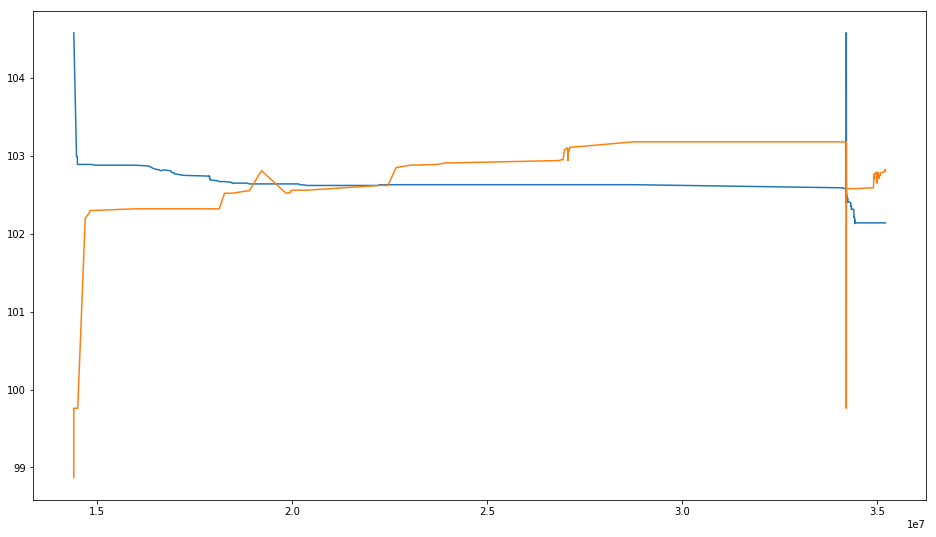

In [5]:
plt.figure(figsize=(16,9))
plt.plot(time,sell, '-')
plt.plot(time,buy, '-')

In [6]:
quotes = [x1 - x2 for (x1, x2) in zip(sell, buy)]

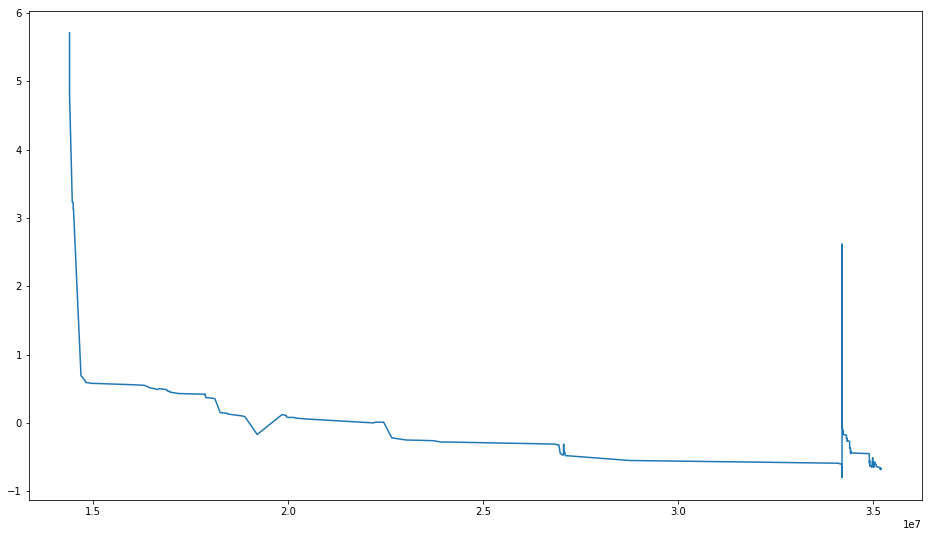

In [7]:
plt.figure(figsize=(16,9))
plt.plot(time,quotes, '-')

In [8]:
print(max(sell))
print(min(sell[1:]))
print(max(buy))
print(min(buy[1:]))

104.58
102.13
103.18
99.76
